In [1]:
from sklearn.model_selection import train_test_split

In [2]:
import torch 
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import pandas as pd
import numpy as np
import zipfile
from PIL import Image
import matplotlib.pyplot as plt
import re
# import pytorch_lightning as pl
from torchvision import transforms as T
from sklearn.model_selection import train_test_split

train_ratio = 0.8

In [3]:
import random

# SEED_VALUE = random.randint(0,100)
SEED_VALUE = 84
print(SEED_VALUE)
random.seed(SEED_VALUE)
torch.manual_seed(SEED_VALUE)
torch.cuda.manual_seed_all(SEED_VALUE)

np.random.seed(SEED_VALUE)

84


In [4]:
!ls
csv_file = './data/train_all_1.csv'
csv_file_1 = './data/database_intent_old.csv'
csv_file_2 = './data/data_new_intent.csv'

BANKING_77
create_test_data.ipynb
data
Embed-label_Setfit.ipynb
envi_data
Multilingual_knowledge_distill_train.py
Multi-lingual-training.ipynb
multi-phoMT
output.jpg
Process_data.ipynb
setfitckpt
setfitckpt_multilingual_distil
setfitckpt_multilingual_test_en
setfitckpt_multilingual_test_en_v1
setfitckpt_multilingual_test_en_v1_af
setfitckpt_multilingual_test_en_v1_af.tar
Setfit.ipynb
test_onnx.ipynb
train.py
vo_van_phuc_setfitckpt_10_4_2023_1_epoch
vo_van_phuc_setfitckpt_10_4_2023_3_epoch_20_iter
vo_van_phuc_setfitckpt_10_4_2023_3_epoch_30_iter
vo_van_phuc_setfitckpt_11_4_2023_1_epoch_20_iter_sample
vo_van_phuc_setfitckpt_11_4_2023_3_epoch_20_iter_sample
vo_van_phuc_setfitckpt_11_4_2023_3_epoch_30_iter_sample
vo_van_phuc_setfitckpt_11_4_2023_3_epoch_30_iter_sample_them_tindung_visa


## Read data train

In [5]:
data_df = pd.read_csv(csv_file)
data_df.head()

FileNotFoundError: [Errno 2] No such file or directory: './data/train_all_1.csv'

In [ ]:
data_df_1

In [20]:
data_df_1 = pd.read_csv(csv_file_1)
data_df_1.head()

,Unnamed: 0,text,label,message_clean
0,0,tư vấn giúp mình với,greetings,tư vấn giúp mình với
1,1,hi,greetings,hi
2,2,hi ad,greetings,hi ad
3,3,chào buổi sáng,greetings,chào buổi sáng
4,4,hello,greetings,hello


In [128]:
data_df_2 = pd.read_csv(csv_file_2)
data_df_2.head()

,Unnamed: 0,text,label
0,0,Tôi nên chọn kênh nào nếu muốn đầu tư?,dautu_kenh
1,1,Tôi có thể đầu tư vào kênh nào?,dautu_kenh
2,2,Muốn đầu tư thì nên chọn kênh nào?,dautu_kenh
3,3,Tư vấn giúp tôi các kênh đầu tư,dautu_kenh
4,4,Đầu tư vào kênh nào được nhỉ?,dautu_kenh


In [10]:
data_df = data_df.loc[1150:]
data_df

,text,label
1150,tôi bị mất ví và tất cả các thẻ của tôi đều ở ...,nghiepvuthe_matthe
1151,tôi đang hoảng loạn tôi bị mất thẻ của tôi giú...,nghiepvuthe_matthe
1152,tôi cần báo cáo thẻ bị đánh cắp,nghiepvuthe_matthe
1153,làm cách nào để thay thế thẻ bị đánh cắp,nghiepvuthe_matthe
1154,bạn có thể cung cấp thông tin để đóng băng thẻ...,nghiepvuthe_matthe
...,...,...
1484,Em muốn làm thẻ ATM ạ,nghiepvuthe_dangkythe
1485,Tôi có thể mở thẻ master online được ko?,nghiepvuthe_dangkythe
1486,Hướng dẫn tôi mở thẻ,nghiepvuthe_dangkythe
1487,mình muốn tạo một cái thẻ atm thì làm sao nhỉ,nghiepvuthe_dangkythe


In [15]:
data_df['label'].replace({"giolamviec_giaodichvien":"giolamviec_chinhanh"}, inplace = True)

/data2/nghiatl/.tmp/ipykernel_3839211/3728802237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['label'].replace({"giolamviec_giaodichvien":"giolamviec_chinhanh"}, inplace = True)


In [124]:
data_df[data_df['label'] == "giolamviec_chinhanh"]

,text,label
1339,bên mình đóng quầy mấy giờ,giolamviec_chinhanh
1340,giao dịch sớm nhất mấy giờ,giolamviec_chinhanh
1341,mấy giờ sáng qua giao dịch được,giolamviec_chinhanh
1342,vib có giao dịch thứ 7 không,giolamviec_chinhanh
1343,chiều mấy giờ đóng giao dịch,giolamviec_chinhanh
1344,mai bên em mấy giờ giao dịch,giolamviec_chinhanh
1345,mở giao dịch mấy giờ,giolamviec_chinhanh
1346,đóng giao dịch muộn nhất lúc nào,giolamviec_chinhanh


In [21]:
data_df_1.drop(columns=['Unnamed: 0', 'text'], inplace = True)
data_df_1.rename(columns = {"message_clean":"text"}, inplace = True)
data_df_1

,label,text
0,greetings,tư vấn giúp mình với
1,greetings,hi
2,greetings,hi ad
3,greetings,chào buổi sáng
4,greetings,hello
...,...,...
759,outofscoreother,tôi phải làm gì khi bị mất hoặc hỏng thiết bị ...
760,outofscoreother,tôi có thể nhờ bạn bè hay người thân đăng ký s...
761,outofscoreother,tiện ích khi đăng ký dịch vụ ebanking
762,outofscoreother,tôi đã chuyển khoản nhưng người thụ hưởng chưa...


In [129]:
data_df_2.drop(columns=['Unnamed: 0'], inplace = True)

<AxesSubplot: >

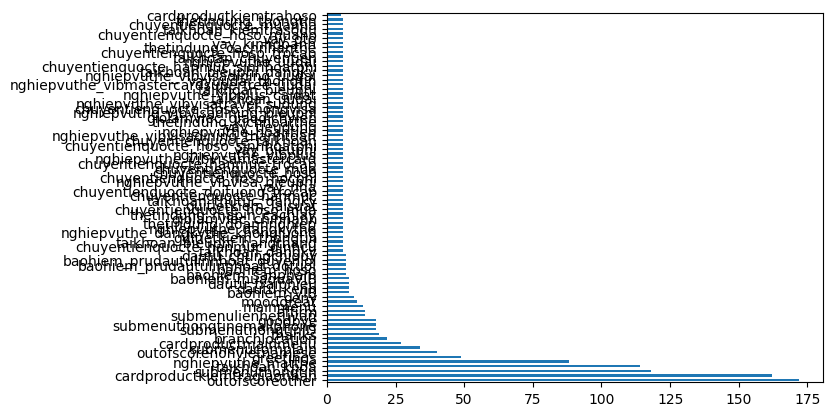

In [17]:
data_df['label'].value_counts().plot(y=['li','la'],kind='barh')

In [33]:
data_df_1 = pd.read_csv(csv_file_1)
data_df_1.head()

,Unnamed: 0,Intent,message,Answer,label
0,0,VIB có thẻ visa/mastercard hay không?,Bên mình có thẻ tín dụng visa hay mastercard g...,Hiện tại VIB đang có 2 loại thẻ tín dụng Visa ...,nghiepvuthe_vibvisamastercard
1,1,VIB có thẻ visa/mastercard hay không?,VIB có những loại thẻ visa hay mastercard nào?,Hiện tại VIB đang có 2 loại thẻ tín dụng Visa ...,nghiepvuthe_vibvisamastercard
2,2,VIB có thẻ visa/mastercard hay không?,Cho tôi thông tin các loại thẻ visa hoặc maste...,Hiện tại VIB đang có 2 loại thẻ tín dụng Visa ...,nghiepvuthe_vibvisamastercard
3,3,VIB có thẻ visa/mastercard hay không?,"VIB có thẻ visa, mastercard như thế nào",Hiện tại VIB đang có 2 loại thẻ tín dụng Visa ...,nghiepvuthe_vibvisamastercard
4,4,VIB có thẻ visa/mastercard hay không?,Tư vấn cho tôi về loại thẻ visa hoặc mastercar...,Hiện tại VIB đang có 2 loại thẻ tín dụng Visa ...,nghiepvuthe_vibvisamastercard


In [35]:
# data_df_1.drop(columns=['Intent', 'Answer', 'Unnamed: 0'], inplace = True)
data_df_1.rename(columns={'message':'text'}, inplace =True)
data_df_1.head()

,text,label
0,Bên mình có thẻ tín dụng visa hay mastercard g...,nghiepvuthe_vibvisamastercard
1,VIB có những loại thẻ visa hay mastercard nào?,nghiepvuthe_vibvisamastercard
2,Cho tôi thông tin các loại thẻ visa hoặc maste...,nghiepvuthe_vibvisamastercard
3,"VIB có thẻ visa, mastercard như thế nào",nghiepvuthe_vibvisamastercard
4,Tư vấn cho tôi về loại thẻ visa hoặc mastercar...,nghiepvuthe_vibvisamastercard


In [42]:
data_df_2 = pd.read_csv(csv_file_2)
data_df_2.head()

,text,label
0,Hôm nay có hoạt động nào trên thẻ của tôi không?,lost_or_stolen_card
1,Tôi bị mất ví và tất cả các thẻ của tôi đều ở ...,lost_or_stolen_card
2,Tôi đang hoảng loạn! Tôi bị mất thẻ của tôi! G...,lost_or_stolen_card
3,Tôi cần báo cáo thẻ bị đánh cắp,lost_or_stolen_card
4,Làm cách nào để thay thế thẻ bị đánh cắp?,lost_or_stolen_card


## Test data

In [66]:
test_csv_file = './data/test.csv'
test_csv_file_3 = './data/test_all_1.csv'

In [67]:
test_df = pd.read_csv(test_csv_file)
test_df_3 = pd.read_csv(test_csv_file_3)
test_df

,label,message,predict_label,message_clean
0,greetings,chào bạn cho mình hỏi chút với ạ,greetings,chào bạn cho mình hỏi chút với ạ
1,greetings,xin chào mình là Nghĩa,greetings,xin chào mình là nghĩa
2,greetings,tên t là Thảo,greetings,tên tôi là thảo
3,greetings,b có thể giúp tôi được không,outofscoreother,bạn có thể giúp tôi được không
4,greetings,t cần hỏi một số việc,mainmenu,tôi cần hỏi một số việc
...,...,...,...,...
222,submenucomplain,bạn trả lời tệ thế,submenucomplain,bạn trả lời tệ thế
223,submenucomplain,tệ thật sự,submenucomplain,tệ thật sự
224,submenucomplain,kém quá đi,submenucomplain,kém quá đi
225,submenucomplain,thái độ nhân viên thiếu chuyên nghiệp,submenucomplain,thái độ nhân viên thiếu chuyên nghiệp


In [164]:
# test_df_3[:197]

In [161]:
# new_test_1 = test_df_3[:197]
# new_test_2 = test_df_3[327:]
# new_test_2

In [165]:
new_test = pd.concat([new_test_1, new_test_2, new_intent_test], ignore_index=True)
new_test

,label,text
0,greetings,chào bạn cho mình hỏi chút với ạ
1,greetings,xin chào mình là nghĩa
2,greetings,tên tôi là thảo
3,greetings,bạn có thể giúp tôi được không
4,greetings,tôi cần hỏi một số việc
...,...,...
407,taikhoan_kiemtrasodu,làm sao để kiểm tra số dư tài khoản ạ
408,dautu_traiphieu,cung cấp cho tôi thông tin về trái phiếu với
409,nghiepvuthe_vibplus,ứng dụng vib plus là gì vậy
410,nghiepvuthe_dangkythe_khongluong,thu nhập của tôi không ổn định thì mở thẻ tín ...


In [166]:
new_test[new_test['label'] == 'giolamviec_giaodichvien']

,label,text
285,giolamviec_giaodichvien,tôi muốn biết thời gian làm việc của giao dịch...
294,giolamviec_giaodichvien,buổi sáng mấy giờ giao dịch viên làm việc


In [167]:
set(data_df_train_af['label'].unique().tolist()) - set(new_test['label'].unique().tolist())

set()

In [168]:
new_test.to_csv('./data/10-04/test_all.csv', index = False)

In [15]:
test_df.rename(columns={'message_clean':'text'}, inplace =True)
test_df.drop(columns=['predict_label', 'message'], inplace = True)
test_df.head()

,label,text
0,greetings,chào bạn cho mình hỏi chút với ạ
1,greetings,xin chào mình là nghĩa
2,greetings,tên tôi là thảo
3,greetings,bạn có thể giúp tôi được không
4,greetings,tôi cần hỏi một số việc


In [25]:
test_df = test_df[(test_df['label'] != 'cardproductdangkythe') & (test_df['label'] != 'cardproductkhuyenmai') & (test_df['label'] != 'submenubieuphi')]

In [16]:
test_df_3.replace({'terminate_account':'taikhoan_khoa', 'lost_or_stolen_card':'nghiepvuthe_matthe'}, inplace = True)

In [31]:
test_df_all = pd.concat([test_df, test_df_3], ignore_index=True)
test_df_all

,label,text
0,greetings,chào bạn cho mình hỏi chút với ạ
1,greetings,xin chào mình là nghĩa
2,greetings,tên tôi là thảo
3,greetings,bạn có thể giúp tôi được không
4,greetings,tôi cần hỏi một số việc
...,...,...
481,taikhoan_khoa,i don t find your services useful anymore how ...
482,taikhoan_khoa,please delete my account this company is not w...
483,taikhoan_khoa,i want to delete my account i m unhappy with t...
484,taikhoan_khoa,can you tell me how to close my account


In [29]:
test_df_3.rename(columns = {'raw_label':'label'}, inplace =True)
test_df_3

,text,label
0,chuẩn bị những giấy tờ gì để mua ngoại tệ du l...,chuyentienquocte_hoso_muaho
1,đi ăn thanh toán bằng thẻ visa dining của vib ...,nghiepvuthe_vibvisadining_uudai
2,vào mùa đông hầu như tôi không có lương vậy tô...,nghiepvuthe_dangkythe_khongluong
3,cần có giấy tờ nào để mua tiền ngoại tệ đi du ...,chuyentienquocte_hoso_khongvisa
4,tôi nên chọn kênh nào nếu muốn đầu tư,dautu_kenh
...,...,...
284,i don t find your services useful anymore how ...,taikhoan_khoa
285,please delete my account this company is not w...,taikhoan_khoa
286,i want to delete my account i m unhappy with t...,taikhoan_khoa
287,can you tell me how to close my account,taikhoan_khoa


In [51]:
test_df_all = test_df_3

In [52]:
test_df_all

,label,text
0,greetings,chào bạn cho mình hỏi chút với ạ
1,greetings,xin chào mình là nghĩa
2,greetings,tên tôi là thảo
3,greetings,bạn có thể giúp tôi được không
4,greetings,tôi cần hỏi một số việc
...,...,...
481,taikhoan_khoa,i don t find your services useful anymore how ...
482,taikhoan_khoa,please delete my account this company is not w...
483,taikhoan_khoa,i want to delete my account i m unhappy with t...
484,taikhoan_khoa,can you tell me how to close my account


In [53]:
test_df_vi = test_df_all[:406]
test_df_en = test_df_all[406:]

In [64]:
new_row = pd.DataFrame({'text':['私は負けた'], 'label':['outofscorenonvietnamese']})
new_row

,text,label
0,私は負けた,outofscorenonvietnamese


In [65]:
test_df_vi = pd.concat([test_df_vi, new_row], ignore_index = True)
test_df_vi

,label,text
0,greetings,chào bạn cho mình hỏi chút với ạ
1,greetings,xin chào mình là nghĩa
2,greetings,tên tôi là thảo
3,greetings,bạn có thể giúp tôi được không
4,greetings,tôi cần hỏi một số việc
...,...,...
405,taikhoan_khoa,công ty này thật tệ bạn có thể chấm dứt tài kh...
406,outofscoreother,tôi bị lạc đường
407,outofscoreother,tôi bị điểm kém
408,outofscorenonvietnamese,jai perdu


In [66]:
test_df_vi.to_csv('./data/test_all.csv', index = False)

In [44]:
test_df_all

NameError: name 'test_df_all' is not defined

## Preprocess data

In [23]:
# from vncorenlp import VnCoreNLP
# rdrsegmenter = VnCoreNLP("./vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') 
import re

uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ_"
punc_re = '[^\w'+uniChars+']'
def process_text(sen):
  ##Unicode reform
  assert isinstance(sen, str), 'Not String'
  # sen = convert_unicode(sen)
  # sen = striphtml(sen)
  ##Remove punctuation
  sen = re.sub(punc_re,' ', sen)
  ##Remove multiple space
  sen = re.sub('\s+',' ', sen)
  ##Lower
  sen = sen.lower().strip()
  ##Segment
  # seg = rdrsegmenter.tokenize(sen)
  # if len(seg) == 0:
  #   sen = ' '
  # else: 
  #   sen = ' '.join(seg[0])
  return sen

In [130]:
data_df_2['text'] = data_df_2['text'].apply(process_text)
# test_df_3['text'] = test_df_3['text'].apply(process_text)
data_df_2.head()

,text,label
0,tôi nên chọn kênh nào nếu muốn đầu tư,dautu_kenh
1,tôi có thể đầu tư vào kênh nào,dautu_kenh
2,muốn đầu tư thì nên chọn kênh nào,dautu_kenh
3,tư vấn giúp tôi các kênh đầu tư,dautu_kenh
4,đầu tư vào kênh nào được nhỉ,dautu_kenh


In [146]:
data_df_fil = data_df[(data_df['label'] != 'submenubieuphi') & (data_df['label'] != 'taikhoan_khoa') & (data_df['label'] != 'nghiepvuthe_matthe')].reset_index(drop=True)

In [147]:
data_df_fil

,text,label
0,bên mình đóng quầy mấy giờ,giolamviec_chinhanh
1,giao dịch sớm nhất mấy giờ,giolamviec_chinhanh
2,mấy giờ sáng qua giao dịch được,giolamviec_chinhanh
3,vib có giao dịch thứ 7 không,giolamviec_chinhanh
4,chiều mấy giờ đóng giao dịch,giolamviec_chinhanh
...,...,...
131,Em muốn làm thẻ ATM ạ,nghiepvuthe_dangkythe
132,Tôi có thể mở thẻ master online được ko?,nghiepvuthe_dangkythe
133,Hướng dẫn tôi mở thẻ,nghiepvuthe_dangkythe
134,mình muốn tạo một cái thẻ atm thì làm sao nhỉ,nghiepvuthe_dangkythe


In [143]:
# data_df_2['label'].replace({"giolamviec_giaodichvien":"giolamviec_chinhanh"}, inplace = True)
data_df_2 = data_df_2[:520]
data_df_2

,text,label
0,tôi nên chọn kênh nào nếu muốn đầu tư,dautu_kenh
1,tôi có thể đầu tư vào kênh nào,dautu_kenh
2,muốn đầu tư thì nên chọn kênh nào,dautu_kenh
3,tư vấn giúp tôi các kênh đầu tư,dautu_kenh
4,đầu tư vào kênh nào được nhỉ,dautu_kenh
...,...,...
515,điểm khác nhau giữa thẻ doanh nghiệp và thẻ cá...,thetindung_doanhnghiep
516,thẻ doanh nghiệp và thẻ cá nhân khác nhau ở đi...,thetindung_doanhnghiep
517,thẻ doanh nghiệp có tính năng gì khác với thẻ ...,thetindung_doanhnghiep
518,thẻ doanh nghiệp và thẻ cá nhân có những điểm ...,thetindung_doanhnghiep


In [144]:
new_intent_train, new_intent_test = train_test_split(data_df_2, test_size=0.25, random_state=42, shuffle=True, stratify=data_df_2['label'])

In [145]:
new_intent_train[new_intent_train['label'] == 'giolamviec_giaodichvien']

,text,label
464,giờ làm việc của giao dịch viên chi nhánh bên ...,giolamviec_giaodichvien
469,thứ 7 giao dịch viên làm việc từ mấy giờ,giolamviec_giaodichvien
461,tôi định buổi chiều qua ngân hàng thì giao dịc...,giolamviec_giaodichvien
468,giao dịch viên làm việc mấy giờ chiều nhỉ,giolamviec_giaodichvien
471,giao dịch viên làm việc mấy giờ đến mấy giờ,giolamviec_giaodichvien
467,sáng giao dịch viên làm việc sớm nhất mấy giờ,giolamviec_giaodichvien


In [148]:
data_new = pd.concat([new_intent_train, data_df_fil], ignore_index = True)

In [150]:
data_df_fil['label'].value_counts()

In [151]:
data_df_fil = data_df[(data_df['label'] == 'submenubieuphi') | (data_df['label'] == 'taikhoan_khoa') | (data_df['label'] == 'nghiepvuthe_matthe')].reset_index(drop=True)

In [152]:
data_new

,text,label
0,mua ngoại tệ du lịch cho người thân có cần giấ...,chuyentienquocte_hoso_muaho
1,giấy tờ để có thể mua tiền ngoại tệ du lịch,chuyentienquocte_hoso_mua
2,vib thu phí tài khoản bao nhiêu khi không sử d...,taikhoan_bieuphi_hangthang
3,nhiều nhất mỗi năm tôi chuyển được bao nhiêu t...,chuyentienquocte_hanmuc_sinhhoatphi
4,tôi chưa dùng thẻ tín dụng bao giờ tư vấn cho ...,thetindung_thongtin
...,...,...
521,Em muốn làm thẻ ATM ạ,nghiepvuthe_dangkythe
522,Tôi có thể mở thẻ master online được ko?,nghiepvuthe_dangkythe
523,Hướng dẫn tôi mở thẻ,nghiepvuthe_dangkythe
524,mình muốn tạo một cái thẻ atm thì làm sao nhỉ,nghiepvuthe_dangkythe


In [153]:
data_df_train_af = pd.concat([data_df_1, data_new, data_df_fil], ignore_index = True)

In [154]:
data_df_train_af['label'].value_counts()

outofscoreother                    172
cardproductkiemtragiaonhan         162
submenuthongtin                    118
taikhoan_khoa                      114
nghiepvuthe_matthe                  87
                                  ... 
taikhoan_bieuphi                     6
taikhoan_thutuc_dangky               6
nghiepvuthe_vibvisadining_uudai      6
chuyentienquocte_hoso_trocap         6
cardproductkiemtrahoso               5
Name: label, Length: 81, dtype: int64

In [155]:
data_df_train_af.to_csv('./data/10-04/train_all.csv', index = False)

In [156]:
data_df_train_af

,label,text
0,greetings,tư vấn giúp mình với
1,greetings,hi
2,greetings,hi ad
3,greetings,chào buổi sáng
4,greetings,hello
...,...,...
1488,submenubieuphi,biểu phí
1489,submenubieuphi,giá như nào
1490,submenubieuphi,phí như nào
1491,submenubieuphi,Chuyển tiền ngoài ngân hàng VIB có mất phí không?


In [42]:
data_df[data_df['label'] == 'goodbye']

,text,label
49,tạm biệt,goodbye
50,bái bai,goodbye
51,gặp lại sau nha,goodbye
52,chào tạm biệt,goodbye
53,bye nhé,goodbye
54,good bye,goodbye
55,see you again,goodbye
56,mai gặp lại nhé bạn,goodbye
57,tạm biệt bot nhé,goodbye
58,bye bye,goodbye


In [43]:
data_df = pd.concat()

,text,label
0,tư vấn giúp mình với,greetings
1,hi,greetings
2,hi ad,greetings
3,chào buổi sáng,greetings
4,hello,greetings
...,...,...
1443,chuyển tiền trợ cấp thân nhân tối đa được,chuyentienquocte_hanmuc_trocap
1444,người thân nhận tiền trợ cấp từ tôi tối đa bao...,chuyentienquocte_hanmuc_trocap
1445,chuyển trợ cấp thân nhân nhiều nhất bao tiền m...,chuyentienquocte_hanmuc_trocap
1446,chuyển tối đa bao nhiêu usd tiền trợ cấp thân ...,chuyentienquocte_hanmuc_trocap


In [46]:
data_df['text'] = data_df['text'].apply(process_text)
data_df.head()

,label,text
0,greetings,tư vấn giúp mình với
1,greetings,hi
2,greetings,hi ad
3,greetings,chào buổi sáng
4,greetings,hello


In [54]:
data_df_1['text'] = data_df_1['text'].apply(process_text)
data_df_2['text'] = data_df_2['text'].apply(process_text)
data_df_2.head()

,text,label
0,hôm nay có hoạt động nào trên thẻ của tôi không,lost_or_stolen_card
1,tôi bị mất ví và tất cả các thẻ của tôi đều ở ...,lost_or_stolen_card
2,tôi đang hoảng loạn tôi bị mất thẻ của tôi giú...,lost_or_stolen_card
3,tôi cần báo cáo thẻ bị đánh cắp,lost_or_stolen_card
4,làm cách nào để thay thế thẻ bị đánh cắp,lost_or_stolen_card


In [60]:
data_df_2 = data_df_2[:190]

<AxesSubplot: >

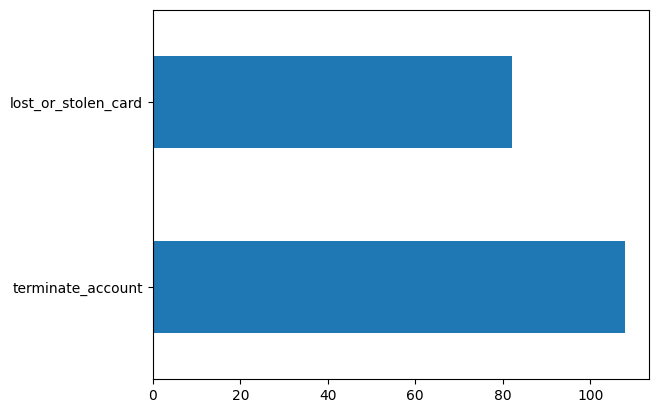

In [61]:
data_df_2['label'].value_counts().plot(y=['li','la'],kind='barh')

In [22]:
def preprocess_sentence(sen):
  sen = process_text(sen)
  sen = tokenize(sen)
  return sen

In [24]:
from pyvi.ViTokenizer import tokenize

def preprocess_text(df):
  sen = df['text']
  sen = tokenize(sen)
  # sen = process_text(sen)
  return sen
# vec_pre = np.vectorize(preprocess_text)
# print(vec_pre((data_df.iloc[3,3])))
# data_df['concat_text'] = data_df.apply(lambda x: preprocess_text(x), axis = 1)

In [65]:
data_df_1_train, data_df_1_test = train_test_split(data_df_1, test_size=0.25, random_state=42, shuffle=True, stratify=data_df_1['label'])
print(data_df_1_train.head())
data_df_1_test['label'].value_counts()

                                                  text  \
75   để hoàn tiền thì tôi cần số tiền tích lũy tối ...   
219                    tư vấn giúp tôi các kênh đầu tư   
149  tôi đang ở nhà nội trợ nhưng có nhà thì có vay...   
496               kích hoạt thẻ tín dụng như thế nào ạ   
465  trong tuần vib mở cửa giao dịch từ mấy giờ đến...   

                       label  
75      nghiepvuthe_hoantien  
219               dautu_kenh  
149             vay_tieudung  
496   thetindung_kichhoatthe  
465  giolamviec_giaodichvien  


baohiem_prudautulinhhoat_quyenloi    3
baohiem_prudautulinhhoat_dotuoi      3
baohiem_hoso                         3
dautu_chungchiquy                    3
baohiem_sanpham                      3
                                    ..
nghiepvuthe_vibplus_caidat           2
vay_bieuphi                          2
taikhoan_bieuphi                     2
chuyentienquocte_hoso_mua            2
chuyentienquocte_hanmuc_dinhcu       2
Name: label, Length: 62, dtype: int64

In [68]:
train_df = pd.concat([data_df, data_df_1_train, data_df_2], ignore_index = True)
train_df

,label,text
0,greetings,tư vấn giúp mình với
1,greetings,hi
2,greetings,hi ad
3,greetings,chào buổi sáng
4,greetings,hello
...,...,...
1352,terminate_account,tôi không hài lòng tôi muốn đóng tài khoản của...
1353,terminate_account,tôi không hài lòng với các dịch vụ mà bạn đang...
1354,terminate_account,tôi cần đóng tài khoản của mình càng sớm càng tốt
1355,terminate_account,tôi không hài lòng với dịch vụ của bạn đóng tà...


In [99]:
test_df_con = pd.concat([data_df_1_test, test_df_3], ignore_index = True)
test_df_con

,text,label
0,chuẩn bị những giấy tờ gì để mua ngoại tệ du l...,chuyentienquocte_hoso_muaho
1,đi ăn thanh toán bằng thẻ visa dining của vib ...,nghiepvuthe_vibvisadining_uudai
2,vào mùa đông hầu như tôi không có lương vậy tô...,nghiepvuthe_dangkythe_khongluong
3,cần có giấy tờ nào để mua tiền ngoại tệ đi du ...,chuyentienquocte_hoso_khongvisa
4,tôi nên chọn kênh nào nếu muốn đầu tư,dautu_kenh
...,...,...
284,i don t find your services useful anymore how ...,terminate_account
285,please delete my account this company is not w...,terminate_account
286,i want to delete my account i m unhappy with t...,terminate_account
287,can you tell me how to close my account,terminate_account


In [69]:
data_df = train_df

In [36]:
label_list = data_df['label'].unique().tolist()

In [37]:
len(label_list)

80

In [38]:
def convert_label(x):
    return label_list.index(x)

In [55]:
data_df['label'] = data_df['label'].apply(lambda x: convert_label(x))
data_df.head()

,text,label
0,tư vấn giúp mình với,0
1,hi,0
2,hi ad,0
3,chào buổi sáng,0
4,hello,0


In [45]:
test_df_all['label'] = test_df_all['label'].apply(lambda x: convert_label(x))
test_df_all

,label,text
0,0,chào bạn cho mình hỏi chút với ạ
1,0,xin chào mình là nghĩa
2,0,tên tôi là thảo
3,0,bạn có thể giúp tôi được không
4,0,tôi cần hỏi một số việc
...,...,...
481,69,i don t find your services useful anymore how ...
482,69,please delete my account this company is not w...
483,69,i want to delete my account i m unhappy with t...
484,69,can you tell me how to close my account


<AxesSubplot: >

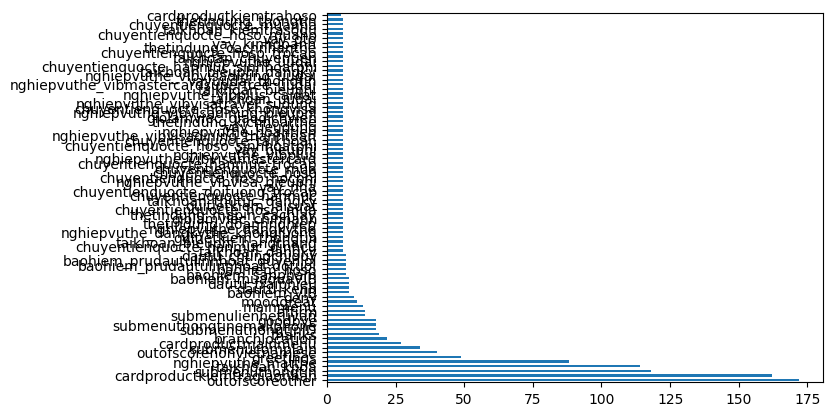

In [46]:
data_df['label'].value_counts().plot(y=['li','la'],kind='barh')

In [47]:
from sentence_transformers.losses import CosineSimilarityLoss
from setfit import SetFitModel, SetFitTrainer, sample_dataset

In [48]:
# train_df = data_df.groupby('label').sample(n=16, random_state = 42)
# train_df

In [49]:
# test_df = data_df.loc[list(set(data_df.index) - set(train_df.index))]
# test_df

In [50]:
# with open('./data/test.json') as f:
#     test_json = json.load(f)
# test_json['submenucomplain']

In [51]:
len(label_list)

80

In [52]:
label_list

['greetings',
 'goodbye',
 'thanks',
 'affirm',
 'deny',
 'moodgreat',
 'mainmenu',
 'submenuthongtin',
 'submenuthongtinID',
 'submenuthongtinemailphone',
 'submenucomplain',
 'submenulienhetuvan',
 'branchlocation',
 'cardproductmainmenu',
 'cardproductkiemtrahoso',
 'cardproductkiemtragiaonhan',
 'outofscorenonvietnamese',
 'outofscoreother',
 'nghiepvuthe_hoantien',
 'dautu_kenh',
 'vay_tieudung',
 'thetindung_kichhoatthe',
 'giolamviec_giaodichvien',
 'nghiepvuthe_vibvisadining_bieuphi',
 'chuyentienquocte_hoso_khongvisa',
 'nghiepvuthe_vibvisatravel_sudung',
 'taikhoan_uudai',
 'nghiepvuthe_vibplus_caidat',
 'dautu_chungchiquy',
 'taikhoan_bieuphi',
 'nghiepvuthe_vibmastercardsuperfree_uudai',
 'baohiem_prudautulinhhoat_quyenloi',
 'vayuudai_thongtin',
 'nghiepvuthe_vibvisadining_uudai',
 'taikhoan_bieuphi_dangky',
 'baohiem_muaquaVIB',
 'dautu_traiphieu',
 'chuyentienquocte_hanmuc_sinhhoatphi',
 'nghiepvuthe_uudai',
 'taikhoan_chuyentien',
 'chuyentienquocte_hoso_sinhhoatphi',
 

In [56]:
train_df = data_df 
test_df = test_df_all

In [57]:
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
train_df.head()

,text,label
0,tư vấn giúp mình với,0
1,hi,0
2,hi ad,0
3,chào buổi sáng,0
4,hello,0


In [40]:
def convert_idx_to_label(x):
    return label_list[int(x)]

In [43]:
# data_df['label'] =  data_df['label'].apply(convert_idx_to_label)
# data_df

In [58]:
from datasets import Dataset

In [59]:
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

In [60]:
print(train_df['label'].value_counts())
print(test_df['label'].value_counts())

17    172
15    162
7     118
69    114
53     88
     ... 
46      6
47      6
49      6
79      6
14      5
Name: label, Length: 80, dtype: int64
53    82
69    82
9     20
0     17
8     14
      ..
29     2
59     2
49     2
24     2
74     2
Name: label, Length: 78, dtype: int64


In [62]:
num_classes = len(label_list)

model = SetFitModel.from_pretrained(
    "sentence-transformers/paraphrase-multilingual-mpnet-base-v2",
    use_differentiable_head=True,
    head_params={"out_features": num_classes}
)

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


In [119]:
model = model.to('cuda:1')

In [43]:
num_classes = len(label_list)

model = SetFitModel.from_pretrained(
    "setfitckpt_multiphoMT"
)

In [44]:
# model = model.to('cuda:1')

In [63]:
next(model.model_body.parameters())

Parameter containing:
tensor([[ 0.0662,  0.0555,  0.0743,  ...,  0.0534,  0.0464,  0.0255],
        [-0.0026,  0.0016, -0.0028,  ...,  0.0028,  0.0014, -0.0028],
        [ 0.0888,  0.0866,  0.0601,  ...,  0.0713, -0.0012,  0.0890],
        ...,
        [ 0.1257, -0.1544,  0.0596,  ...,  0.0792,  0.0191,  0.0341],
        [ 0.0070, -0.0440,  0.0062,  ..., -0.0052,  0.0124, -0.0409],
        [ 0.0358,  0.0211,  0.0197,  ...,  0.0437, -0.0023,  0.0433]],
       device='cuda:0', requires_grad=True)

In [64]:
config = dict(
    model="sentence-transformers/paraphrase-mpnet-base-v2",
    metric="f1",
    batch_size=16,
    num_iterations=20,
    num_epochs=1,
    body_learning_rate=1e-5, # The body's learning rate
    learning_rate=1e-2, # The head's learning rate
    l2_weight=0.0, # Weight decay on **both** the body and head. If `None`, will use 0.01.
    mixed_precision=True,
)

In [65]:
trainer = SetFitTrainer(
        model=model,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        loss_class=CosineSimilarityLoss,
        metric=config["metric"],
        batch_size=config["batch_size"],
        num_iterations=config["num_iterations"],
        num_epochs=config["num_epochs"],
        column_mapping={"text": "text", "label": "label"}
    )

In [66]:
len(label_list)

80

In [67]:
trainer.freeze() # Freeze the head
trainer.train(
        body_learning_rate=config["body_learning_rate"],
        num_epochs=config["num_epochs"]
    )

Applying column mapping to training dataset
***** Running training *****
  Num examples = 53560
  Num epochs = 1
  Total optimization steps = 3348
  Total train batch size = 16


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/3348 [00:00<?, ?it/s]

In [68]:
!nvidia-smi

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Sat Apr  8 10:32:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 460.27.04    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 3090    Off  | 00000000:00:07.0 Off |                  N/A |
| 37

In [69]:
# Unfreeze the head and freeze the body -> head-only training
trainer.unfreeze(keep_body_frozen=True)
# or
# Unfreeze the head and unfreeze the body -> end-to-end training
# trainer.unfreeze(keep_body_frozen=False)

In [70]:
trainer.metric = 'accuracy'
trainer.metric

'accuracy'

In [71]:
trainer.train(learning_rate=1e-2, num_epochs=50)
metrics = trainer.evaluate()
print(metrics)

Applying column mapping to training dataset
The `max_length` is `None`. Using the maximum acceptable length according to the current model body: 128.


Epoch:   0%|          | 0/50 [00:00<?, ?it/s]

Applying column mapping to evaluation dataset
***** Running evaluation *****


{'accuracy': 0.9197530864197531}


In [72]:
trainer

In [73]:
trainer.model._save_pretrained('setfitckpt_multilingual_8_4_2023')

In [74]:
import gc

del trainer, model
gc.collect()
torch.cuda.empty_cache()

In [75]:
model = SetFitModel.from_pretrained("./setfitckpt_multilingual_8_4_2023")

In [54]:
model = trainer.model

In [76]:
model

SetFitModel()

In [77]:
model.model_body[0]

Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: XLMRobertaModel 

## Evaluation

In [78]:
test_df

,label,text
0,0,chào bạn cho mình hỏi chút với ạ
1,0,xin chào mình là nghĩa
2,0,tên tôi là thảo
3,0,bạn có thể giúp tôi được không
4,0,tôi cần hỏi một số việc
...,...,...
481,69,i don t find your services useful anymore how ...
482,69,please delete my account this company is not w...
483,69,i want to delete my account i m unhappy with t...
484,69,can you tell me how to close my account


In [79]:
test_df['label'].value_counts()

53    82
69    82
9     20
0     17
8     14
      ..
29     2
59     2
49     2
24     2
74     2
Name: label, Length: 78, dtype: int64

In [136]:
model.model_head.to('cuda:0')

SetFitHead({'in_features': 768, 'out_features': 82, 'temperature': 1.0, 'bias': True, 'device': 'cuda'})

In [80]:
next(model.model_head.parameters())

Parameter containing:
tensor([[ 0.3438, -0.2889,  0.2725,  ...,  0.1824, -0.1427,  0.2434],
        [ 0.3158,  0.0963, -0.0075,  ...,  0.0241,  0.1344, -0.0600],
        [ 0.4892, -0.2469, -0.0107,  ..., -0.3360,  0.0861,  0.4114],
        ...,
        [ 0.0019,  0.2111,  0.5973,  ...,  0.0271, -0.0951, -0.1918],
        [ 0.7611, -0.1962,  0.5032,  ...,  0.1635, -0.2315, -0.0970],
        [-0.2307, -0.3110,  0.1186,  ...,  0.3005, -0.0477,  0.1113]],
       device='cuda:0', requires_grad=True)

In [81]:
preds = model(list(test_df['text']))

In [82]:
preds = preds.cpu()

In [83]:
y_true = list(test_df['label'])

In [84]:
from sklearn.metrics import classification_report

In [12]:
train_df = pd.read_csv('./data/train_all.csv')
label_list = train_df['label'].unique().tolist()

In [90]:
false_label = []

In [16]:
idx = 54
label_list[idx]

'taikhoan_bieuphi_hangthang'

In [118]:
false_label.append(label_list[idx])
false_label

['goodbye',
 'cardproductmainmenu',
 'cardproductkiemtrahoso',
 'giolamviec_giaodichvien',
 'nghiepvuthe_vibvisadining_bieuphi',
 'baohiem_prudautulinhhoat_quyenloi',
 'thetindung_cachnhanthe',
 'baohiem_prudautulinhhoat_dotuoi',
 'nghiepvuthe_vibvisadining_thanhtoan',
 'taikhoan_bieuphi_hangthang',
 'baohiem_hoso',
 'chuyentienquocte_hoso_mua',
 'chuyentienquocte_doituong_trocap',
 'chuyentienquocte_hanmuc_trocap']

In [86]:
print(classification_report(y_true, preds))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.89      0.67      0.76        12
           2       1.00      1.00      1.00        12
           3       0.92      1.00      0.96        12
           4       1.00      0.82      0.90        11
           5       1.00      0.91      0.95        11
           6       1.00      0.36      0.53        11
           7       0.92      1.00      0.96        11
           8       0.93      1.00      0.97        14
           9       1.00      0.85      0.92        20
          10       0.90      0.90      0.90        10
          11       0.92      0.92      0.92        12
          12       1.00      0.92      0.96        12
          13       0.75      0.75      0.75        12
          14       0.60      1.00      0.75         9
          15       1.00      1.00      1.00        11
          17       0.00      0.00      0.00         0
          18       1.00    

/data2/nghiatl/anaconda3/envs/SEO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data2/nghiatl/anaconda3/envs/SEO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data2/nghiatl/anaconda3/envs/SEO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data2

In [54]:
label_list.index('submenuthongtin')

7

In [68]:
false_preds_idx = []
false_preds = []
for idx, p in enumerate(zip(preds, y_true)):
    if p[0] == p[1]:
        # print(p)
        false_preds_idx.append(idx)
        false_preds.append(int(p[0]))

In [69]:
test_false_df = test_df.iloc[false_preds_idx]
test_false_df

,label,predict_label,text
0,0,greetings,chào bạn cho mình hỏi chút với ạ
1,0,greetings,xin chào mình là nghĩa
2,0,greetings,tên tôi là thảo
4,0,mainmenu,tôi cần hỏi một số việc
5,0,greetings,xin chào bạn có thể giúp tôi một số việc được ...
...,...,...,...
427,11,NaN,You answer so badly
428,11,NaN,really bad
429,11,NaN,Too worse
430,11,NaN,Staff attitude is unprofessional


In [70]:
def convert_id_to_label(id_label):
    return label_list[id_label]

In [71]:
test_false_df['preds'] = false_preds
test_false_df

/data2/nghiatl/.tmp/ipykernel_1458156/499004396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_false_df['preds'] = false_preds


,label,predict_label,text,preds
0,0,greetings,chào bạn cho mình hỏi chút với ạ,0
1,0,greetings,xin chào mình là nghĩa,0
2,0,greetings,tên tôi là thảo,0
4,0,mainmenu,tôi cần hỏi một số việc,0
5,0,greetings,xin chào bạn có thể giúp tôi một số việc được ...,0
...,...,...,...,...
427,11,NaN,You answer so badly,11
428,11,NaN,really bad,11
429,11,NaN,Too worse,11
430,11,NaN,Staff attitude is unprofessional,11


In [72]:
test_false_df['label'] = test_false_df['label'].apply(convert_id_to_label)

/data2/nghiatl/.tmp/ipykernel_1458156/3469866742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_false_df['label'] = test_false_df['label'].apply(convert_id_to_label)


In [73]:
test_false_df['preds'] = test_false_df['preds'].apply(convert_id_to_label)

/data2/nghiatl/.tmp/ipykernel_1458156/4291957028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_false_df['preds'] = test_false_df['preds'].apply(convert_id_to_label)


In [74]:
# test_false_df.drop(columns=['Unnamed: 0'], inplace = True)
test_false_df = test_false_df.reset_index(drop=True)
test_false_df

,label,predict_label,text,preds
0,greetings,greetings,chào bạn cho mình hỏi chút với ạ,greetings
1,greetings,greetings,xin chào mình là nghĩa,greetings
2,greetings,greetings,tên tôi là thảo,greetings
3,greetings,mainmenu,tôi cần hỏi một số việc,greetings
4,greetings,greetings,xin chào bạn có thể giúp tôi một số việc được ...,greetings
...,...,...,...,...
382,submenucomplain,NaN,You answer so badly,submenucomplain
383,submenucomplain,NaN,really bad,submenucomplain
384,submenucomplain,NaN,Too worse,submenucomplain
385,submenucomplain,NaN,Staff attitude is unprofessional,submenucomplain


In [75]:
train_df[train_df['label'] == 17]

,label,text,concat_text
443,17,tôi muốn kiểm tra hồ sơ mở thẻ,tôi muốn kiểm_tra hồ_sơ mở thẻ
444,17,tôi đăng kí chưa nhận được thông tin,tôi đăng_kí chưa nhận được thông_tin
445,17,mình cần tra thông tin cá nhân,mình cần tra thông_tin cá_nhân
446,17,tôi chưa thấy thông tin của mình,tôi chưa thấy thông_tin của mình
447,17,kiểm tra hồ sơ đăng ký thẻ atm,kiểm_tra hồ_sơ đăng_ký thẻ atm
1258,17,I want to check the card opening,I want to check the card opening
1259,17,I have not yet received the information,I have not yet received the_information
1260,17,I need to look up personal information,I need to look up personal information
1261,17,I have not seen my information,I have not seen my information
1262,17,Check the ATM card registration record,Check the ATM card registration record


In [76]:
label_list[8]

'submenuthongtinID'

In [77]:
test_false_df.to_excel('./data/true_predict_differ_head_multilingual_on_multi_test_app_2.xlsx', index = False)

In [172]:
test_df_50 = pd.read_csv('./dataset/3_xa_hoi_test_crawled.csv')
test_df_50.head()

,Link bài,title,sapo,content
0,https://kenh14.vn/phi-cong-may-bay-su-22-hy-si...,Phi công máy bay Su-22 hy sinh được truy tặng ...,Ban Thường vụ Trung ương Đoàn TNCS Hồ Chí Minh...,"Ngày 1/2, Bí thư Thường trực Trung ương Đoàn N..."
1,https://kenh14.vn/tai-nan-may-bay-quan-su-o-ye...,"Tai nạn máy bay quân sự ở Yên Bái, một phi côn...","Chiều 31/1, nguồn tin của Tiền Phong cho biết ...","Theo đó, vào lúc 12 giờ 9 phút cùng ngày, máy ..."
2,https://kenh14.vn/loi-khai-cua-ke-cuop-tiem-va...,Lời khai của kẻ cướp tiệm vàng ngày vía Thần T...,"Sau khi tiêu hết tiền, Huỳnh Dũng Em nảy sinh ...","Công an thị xã Bình Minh, tỉnh Vĩnh Long vẫn đ..."


In [80]:
test_df_50.loc[test_df_50['Chủ đề'] == 'ngày, lễ đặc biệt', "Chủ đề"]= "ngày lễ trong năm"

In [180]:
test_df_50.iloc[0]['sapo']

'Ban Thường vụ Trung ương Đoàn TNCS Hồ Chí Minh truy tặng Huy hiệu "Tuổi trẻ dũng cảm" cho Thiếu tá Trần Ngọc Duy vì đã dũng cảm hy sinh khi thực hiện nhiệm vụ.'

In [81]:
test_df_50['label'] = test_df_50['Chủ đề'].apply(lambda x: convert_label(x))
test_df_50.head()

,Chủ đề,Link bài,title,sapo,content,label
0,cháy,https://kenh14.vn/clip-xe-oto-con-dang-chay-ba...,CLIP: Xe ôtô con đang chạy bất ngờ bốc cháy ng...,"Đang lưu thông trên quốc lộ, xe ôtô con bất ng...","Vụ việc trên xảy lúc hơn 20 giờ ngày 31-10, tr...",5
1,bão,https://kenh14.vn/bao-so-7-cach-quan-dao-hoang...,"Bão số 7 cách quần đảo Hoàng Sa khoảng 570km, ...","Trong 12 giờ tới, bão có khả năng mạnh thê...",Trung tâm Dự báo khí tượng thủy văn quốc gia c...,9
2,tai nạn,https://kenh14.vn/tang-thuong-ca-gia-dinh-cong...,Tang thương cả gia đình công nhân ra đi vì tai...,"14 giờ chiều nay (2/11), gia đình sẽ tổ chức a...",Tại lễ tang 3 cha con anh Phạm Văn Luốc (37 tu...,6
3,dự báo thời tiết,https://kenh14.vn/bac-bo-co-the-ret-dam-trong-...,Bắc Bộ có thể rét đậm trong dịp Tết Nguyên đán,"Theo dự báo, dịp Tết Nguyên đán năm 2023, Bắc ...",Theo Trung tâm Dự báo Khí tượng Thuỷ văn Quốc ...,8
4,dự báo thời tiết,https://kenh14.vn/chuyen-gia-ret-dam-ret-hai-b...,"Chuyên gia: Rét đậm, rét hại, băng giá có thể ...",Chuyên gia thời tiết đưa ra những cảnh báo về ...,"Video: Chuyên gia cảnh báo đợt rét đậm, rét hạ...",8


In [173]:
test_df_50['concat_text'] = test_df_50.apply(lambda x: preprocess_text(x), axis = 1)
test_df_50

,Link bài,title,sapo,content,concat_text
0,https://kenh14.vn/phi-cong-may-bay-su-22-hy-si...,Phi công máy bay Su-22 hy sinh được truy tặng ...,Ban Thường vụ Trung ương Đoàn TNCS Hồ Chí Minh...,"Ngày 1/2, Bí thư Thường trực Trung ương Đoàn N...",Phi_công máy_bay Su 22 hy_sinh được truy_tặng ...
1,https://kenh14.vn/tai-nan-may-bay-quan-su-o-ye...,"Tai nạn máy bay quân sự ở Yên Bái, một phi côn...","Chiều 31/1, nguồn tin của Tiền Phong cho biết ...","Theo đó, vào lúc 12 giờ 9 phút cùng ngày, máy ...",Tai_nạn máy_bay quân_sự ở Yên_Bái một phi_công...
2,https://kenh14.vn/loi-khai-cua-ke-cuop-tiem-va...,Lời khai của kẻ cướp tiệm vàng ngày vía Thần T...,"Sau khi tiêu hết tiền, Huỳnh Dũng Em nảy sinh ...","Công an thị xã Bình Minh, tỉnh Vĩnh Long vẫn đ...",Lời khai của kẻ_cướp tiệm vàng ngày vía Thần_T...


In [102]:
label_l = ['rơi chung cư', 'Ngày cá tháng tư', 'Tết', 'ngày cô hồn', 'Lễ vu lan', 'hiếp dâm', 'cháy', 'tai nạn', 'Trung thu', 'dự báo thời tiết', 'bão', 'ngày lễ trong năm', 'Lễ Thất tịch', 'doanh nhân/ đại gia /người nổi tiếng', 'vụ án: chém/giết người/thảm sát/nổ súng', 'phốt', 'ngộ độc thực phẩm', 'bạo hành', 'đánh ghen']

In [103]:
preds = [convert_label(label_l[p]) for p in preds]

In [147]:
label_list[11]

'Lễ Thất tịch'

In [106]:
# ckpt 3
print(classification_report(y_true, preds))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           5       0.80      1.00      0.89         4
           6       1.00      0.93      0.96        14
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00         2
          10       0.00      0.00      0.00         1
          13       1.00      1.00      1.00        11

    accuracy                           0.96        50
   macro avg       0.69      0.70      0.69        50
weighted avg       0.96      0.96      0.96        50



/home/nghiatl/anaconda3/envs/SEO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nghiatl/anaconda3/envs/SEO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nghiatl/anaconda3/envs/SEO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ngh

In [91]:
#ckpt
print(classification_report(y_true, preds))

              precision    recall  f1-score   support

           5       0.80      1.00      0.89         4
           6       1.00      0.93      0.96        14
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          13       1.00      1.00      1.00        11

    accuracy                           0.96        50
   macro avg       0.69      0.70      0.69        50
weighted avg       0.96      0.96      0.96        50



/home/nghiatl/anaconda3/envs/SEO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nghiatl/anaconda3/envs/SEO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nghiatl/anaconda3/envs/SEO/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ngh

In [150]:
false_preds_idx = []
for idx, p in enumerate(zip(preds, y_true)):
    if p[1] == 10 and p[0] != p[1]:
        print(p)
        false_preds_idx.append(idx)
false_preds_idx

(2, 10)


[47]

In [152]:
test_df_50.iloc[false_preds_idx]

,Chủ đề,Link bài,title,sapo,content,label,concat_text
47,ngày lễ trong năm,https://kenh14.vn/dan-cong-so-ha-noi-ngoi-chat...,Dân công sở Hà Nội ngồi chật kín giữa trời rét...,Tối ngày 31/1 (tức ngày 10 tháng Giêng âm lịch...,"Theo ghi nhận của phóng viên, lượng người đi m...",10,Dân_công_sở Hà_Nội ngồi chật kín giữa trời rét...


In [154]:
test_df_50.iloc[false_preds_idx].iloc[0]['sapo']

'Tối ngày 31/1 (tức ngày 10 tháng Giêng âm lịch hay còn được gọi là ngày vía Thần Tài), các cửa hàng vàng trên địa bàn Hà Nội vẫn chật kín người dân mua vàng.'

In [52]:
# from sentence_transformers import SentenceTransformer
# from pyvi.ViTokenizer import tokenize

# model = SentenceTransformer('VoVanPhuc/sup-SimCSE-VietNamese-phobert-base')

# sentences = ['Kẻ đánh bom đinh tồi tệ nhất nước Anh.',
#           'Nghệ sĩ làm thiện nguyện - minh bạch là việc cấp thiết.',
#           'Bắc Giang tăng khả năng điều trị và xét nghiệm.',
#           'HLV futsal Việt Nam tiết lộ lý do hạ Lebanon.',
#           'việc quan trọng khi kêu gọi quyên góp từ thiện là phải minh bạch, giải ngân kịp thời.',
#           '20% bệnh nhân Covid-19 có thể nhanh chóng trở nặng.',
#           'thái Lan thua giao hữu trước vòng loại World Cup.',
#           'Cựu tuyển thủ Nguyễn Bảo Quân: May mắn ủng hộ futsal Việt Nam',
#           'Chủ ki-ốt bị đâm chết trong chợ đầu mối lớn nhất Thanh Hoá.',
#           'Bắn chết người trong cuộc rượt đuổi trên sông.'
#           ]

# sentences = [tokenize(sentence) for sentence in sentences]
# embeddings = model.encode(sentences)

In [30]:
# sentences = ['Kẻ đánh bom đinh tồi tệ nhất nước Anh.',
#           'Nghệ sĩ làm thiện nguyện - minh bạch là việc cấp thiết.',
#           'Bắc Giang tăng khả năng điều trị và xét nghiệm.',
#           'HLV futsal Việt Nam tiết lộ lý do hạ Lebanon.',
#           'việc quan trọng khi kêu gọi quyên góp từ thiện là phải minh bạch, giải ngân kịp thời.',
#           '20% bệnh nhân Covid-19 có thể nhanh chóng trở nặng.',
#           'Thái lan thua giao hữu trước vòng loại World Cup.',
#           'Cựu tuyển thủ Nguyễn Bảo Quân: May mắn ủng hộ futsal Việt Nam bà Phương Hằng',
#           'Chủ ki-ốt bị đâm chết trong chợ đầu mối lớn nhất Thanh Hoá.',
#           'Bắn chết người trong cuộc rượt đuổi trên sông.',
#           'Công an TP Thủ Đức TP HCM làm rõ nguyên nhân vụ việc nam thanh niên rơi từ tầng 22 của một chung cư tử vong',
#           'Công an TP Thủ Đức, TP.HCM làm rõ nguyên nhân vụ việc nam thanh niên rơi từ tầng 22 của một chung cư tử vong.'
#           ]

# sentences = [tokenize(sentence) for sentence in sentences]
# sentences

In [117]:
test_df = pd.read_csv('./data/test.csv')

In [128]:
test_df.iloc[95, [1]] = 'submenuthongtinemailphone' 

In [131]:
test_df[test_df['label'] == 'submenuthongtin']

,label,message,predict_label,message_clean
87,submenuthongtin,t muốn thay đổi thông tin,submenuthongtin,tôi muốn thay đổi thông tin
88,submenuthongtin,tôi muốn thay đổi thông tin,submenuthongtin,tôi muốn thay đổi thông tin
89,submenuthongtin,muốn cập nhật thông tin thì làm như thế nào đư...,submenuthongtin,muốn cập nhật thông tin thì làm như thế nào đư...
90,submenuthongtin,muốn sửa thông tin thì làm cách nào b,submenuthongtin,muốn sửa thông tin thì làm cách nào bạn
91,submenuthongtin,b hướng dẫn tôi cách sửa thông tin cá nhân đượ...,submenuthongtin,bạn hướng dẫn tôi cách sửa thông tin cá nhân đ...
92,submenuthongtin,t muốn cập nhật thông tin của mình,submenuthongtin,tôi muốn cập nhật thông tin của mình
97,submenuthongtin,t muốn thay đổi họ tên của mình,submenuthongtin,tôi muốn thay đổi họ tên của mình
98,submenuthongtin,thay đổi họ tên thì làm như thế nào,submenuthongtin,thay đổi họ tên thì làm như thế nào
99,submenuthongtin,thay đổi thông tin của tôi thì làm như thế nào,submenuthongtin,thay đổi thông tin của tôi thì làm như thế nào
100,submenuthongtin,t cần thay đổi thông tin cá nhân,submenuthongtin,tôi cần thay đổi thông tin cá nhân


In [98]:
test_df['label'].unique()

array(['greetings', 'goodbye', 'thanks', 'affirm', 'deny', 'moodgreat',
       'mainmenu', 'submenuthongtin', 'submenuthongtinID',
       'submenuthongtinemailphone', 'submenubieuphi',
       'submenulienhetuvan', 'branchlocation', 'cardproductmainmenu',
       'cardproductdangkythe', 'cardproductkhuyenmai',
       'cardproductkiemtrahoso', 'cardproductkiemtragiaonhan',
       'submenucomplain'], dtype=object)

In [130]:
test_df.drop(columns=['Unnamed: 0'], inplace = True)

In [132]:
test_df.to_csv('./data/test.csv', index = False)
test_df

,label,message,predict_label,message_clean
0,greetings,chào bạn cho mình hỏi chút với ạ,greetings,chào bạn cho mình hỏi chút với ạ
1,greetings,xin chào mình là Nghĩa,greetings,xin chào mình là nghĩa
2,greetings,tên t là Thảo,greetings,tên tôi là thảo
3,greetings,b có thể giúp tôi được không,outofscoreother,bạn có thể giúp tôi được không
4,greetings,t cần hỏi một số việc,mainmenu,tôi cần hỏi một số việc
...,...,...,...,...
223,submenucomplain,bạn trả lời tệ thế,submenucomplain,bạn trả lời tệ thế
224,submenucomplain,tệ thật sự,submenucomplain,tệ thật sự
225,submenucomplain,kém quá đi,submenucomplain,kém quá đi
226,submenucomplain,thái độ nhân viên thiếu chuyên nghiệp,submenucomplain,thái độ nhân viên thiếu chuyên nghiệp
